In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sb
sb.set_context('talk')

from sqlalchemy import create_engine, text
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Exploración y Curación de Datos**

*Edición 2024*

----

# Trabajo práctico entregable - parte 1

En esta notebook, vamos a cargar el conjunto de datos de [la compentencia Kaggle](https://www.kaggle.com/dansbecker/melbourne-housing-snapshot) sobre estimación de precios de ventas de propiedades en Melbourne, Australia.

Utilizaremos el conjunto de datos reducido producido por [DanB](https://www.kaggle.com/dansbecker). Hemos subido una copia a un servidor de la Universidad Nacional de Córdoba para facilitar su acceso remoto.

In [5]:
import plotly
plotly.__version__


'5.6.0'

In [6]:
#datos propiedades en Merlbourne
melb_df = pd.read_csv(
    'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv')
len(melb_df)

13580

In [7]:
melb_df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

## Ejercicio 1 SQL:

1. Crear una base de datos en SQLite utilizando la libreria [SQLalchemy](https://stackoverflow.com/questions/2268050/execute-sql-from-file-in-sqlalchemy).
https://docs.sqlalchemy.org/en/14/core/engines.html#sqlite

2. Ingestar los datos provistos en 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv' en una tabla y el dataset generado en clase con datos de airbnb y sus precios por codigo postal en otra.

3. Implementar consultas en SQL que respondan con la siguiente información:

    - cantidad de registros totales por ciudad.
    - cantidad de registros totales por barrio y ciudad.

4. Combinar los datasets de ambas tablas ingestadas utilizando el comando JOIN de SQL  para obtener un resultado similar a lo realizado con Pandas en clase.  



Traemos la tabla de datos de airbnb. Este data frame lo llamaremos airbnb_df.

In [8]:
# data source:
# https://www.kaggle.com/tylerx/melbourne-airbnb-open-data?select=cleansed_listings_dec18.csv

#Llamamos las columnas de interés unicamente.
interesting_cols = [
  'description', 'neighborhood_overview',
  'street', 'neighborhood', 'city', 'suburb', 'state', 'zipcode',
  'price', 'weekly_price', 'monthly_price',
  'latitude', 'longitude',
]
airbnb_df = pd.read_csv(
    'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/cleansed_listings_dec18.csv',
    usecols=interesting_cols)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_17784\1214784395.py:11: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  airbnb_df = pd.read_csv(


# Pasamos a números enteros los zipcode y postcode.
Previo a subirlos a la base de datos SQLite.
Compatibilización unidades de Price ambas data set

In [9]:
#El comando errors = "coerce" indica que si encuentra valores que no pueden ser convertidos a números, los convierte en NaN
melb_df['Postcode'] = pd.to_numeric(melb_df.Postcode, errors='coerce')
airbnb_df['zipcode'] = pd.to_numeric(airbnb_df.zipcode, errors='coerce')

#Convertimos los números de la columna "xx" en números enteros
melb_df['Postcode'] = melb_df.Postcode.fillna(0).astype('int')
airbnb_df['zipcode'] = airbnb_df.zipcode.fillna(0).astype('int')
# Divido la columna price de melb por 1E4 para que ambas columnas precio queden en las mismas unidades
melb_df['Price']=melb_df['Price']/1E4

# Creación base de datos en SQLite
Vamos a crear una base de datos en SQLite, la cual va estar formada por las tablas de datos provenientes de la URL de famaf y la tabla de datos de airbnb.
A esta base de datos, la cual llamaremos db.entregable1, la usaremos para implementar las consultas utilizando SQL.

A continuación, generamos la base de datos en SQLite:

In [11]:
# Qué es el engine? entiendo que es la conexión con la base de datos db.entregable1
# el comando a continuación crea mi conexión (engine) cuyo dialecto será sqlite a la base de datos
engine = create_engine('sqlite:///db.entregable1', echo=True)
#Dudas, genera una conexión a la nube SQLite donde se encontraran mis datos (famaf y aribnb) en la base de datos llamada db.entregable1

Ingestamos los datos de la tabla en la base de datos de SQLite

In [12]:
#Tengo que "poner" en la base de datos las tablas.
#Vamos con data frame Melbourne
melb_df.to_sql('melb', con=engine, if_exists="replace") # melb es el nombre que tendra esa tabla de datos en la base de datos

2024-05-15 09:21:29,606 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("melb")
2024-05-15 09:21:29,606 INFO sqlalchemy.engine.Engine [raw sql] ()


2024-05-15 09:21:29,606 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("melb")
2024-05-15 09:21:29,606 INFO sqlalchemy.engine.Engine [raw sql] ()
2024-05-15 09:21:29,618 INFO sqlalchemy.engine.Engine SELECT name FROM sqlite_master WHERE type='table' ORDER BY name
2024-05-15 09:21:29,619 INFO sqlalchemy.engine.Engine [raw sql] ()
2024-05-15 09:21:29,620 INFO sqlalchemy.engine.Engine PRAGMA main.table_xinfo("melb")
2024-05-15 09:21:29,621 INFO sqlalchemy.engine.Engine [raw sql] ()
2024-05-15 09:21:29,623 INFO sqlalchemy.engine.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type = 'table'
2024-05-15 09:21:29,624 INFO sqlalchemy.engine.Engine [raw sql] ('melb',)
2024-05-15 09:21:29,625 INFO sqlalchemy.engine.Engine PRAGMA main.foreign_key_list("melb")
2024-05-15 09:21:29,625 INFO sqlalchemy.engine.Engine [raw sql] ()
2024-05-15 09:21:29,625 INFO sqlalchemy.engine.Engine PRAGMA temp.foreign_key_list("melb")
2024-05

13580

In [13]:
#Tengo que "poner" en la base de datos las tablas.
#Vamos con data frame Airbnb
airbnb_df.to_sql('airbnb', con=engine, if_exists="replace") # idem para airbnb

#Duda, lo hice separado porque cuando lo hice junto solo me mostraba info de Melb y no de airbnb. Es que no se puede cargar dos a la vez?
# Agrego esto para que no muestre sólo la última orden de celda


2024-05-15 09:21:33,605 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("airbnb")
2024-05-15 09:21:33,606 INFO sqlalchemy.engine.Engine [raw sql] ()
2024-05-15 09:21:33,608 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("airbnb")
2024-05-15 09:21:33,609 INFO sqlalchemy.engine.Engine [raw sql] ()
2024-05-15 09:21:33,610 INFO sqlalchemy.engine.Engine SELECT name FROM sqlite_master WHERE type='table' ORDER BY name
2024-05-15 09:21:33,611 INFO sqlalchemy.engine.Engine [raw sql] ()
2024-05-15 09:21:33,612 INFO sqlalchemy.engine.Engine PRAGMA main.table_xinfo("airbnb")
2024-05-15 09:21:33,612 INFO sqlalchemy.engine.Engine [raw sql] ()
2024-05-15 09:21:33,612 INFO sqlalchemy.engine.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type = 'table'
2024-05-15 09:21:33,612 INFO sqlalchemy.engine.Engine [raw sql] ('airbnb',)
2024-05-15 09:21:33,612 INFO sqlalchemy.engine.Engine PRAGMA main.foreign_key_list("airbnb")
202

22895

# Implementacion de consultas

A la base de datos creada queremos realizarle las siguientes consultas:

- cantidad de registros totales por ciudad.
- cantidad de registros totales por barrio y ciudad.



In [14]:
#Queries de las consultas anteriores

query1 = "SELECT city, COUNT(*) AS cantidad FROM airbnb GROUP BY city" #cantidad de registros totales por ciudad
query2 = "SELECT city, neighborhood, COUNT(*) AS cantidad FROM airbnb GROUP BY city, neighborhood" #cantidad de registros totales por ciudad Y BARRIO
query3 = "SELECT Suburb, COUNT(*) AS cantidad FROM melb GROUP BY Suburb" 
query4 = "SELECT Regionname, Suburb, COUNT(*) FROM melb GROUP BY Regionname, Suburb;"

queries = [query1, query2, query3, query4]

#Creamos los data frame para los datos que cumplan con las query anteriores (NO LO USAMOS PORQUE USA LIBRERIA PANDA)
#city_count_df = pd.read_sql_query(query1, engine)
#city_neig_count_df = pd.read_sql_query(query2, engine)

Ejecutamos las queries establecidas en loop.

In [15]:
#Ejecutamos todas las queries en un loop
with engine.connect() as con:
    for query in queries:
      rs = con.execute(text(query))
      print(query)
      for row in rs:
          print(row)

      print('\n\n')

2024-05-15 09:21:41,582 INFO sqlalchemy.engine.Engine SELECT city, COUNT(*) AS cantidad FROM airbnb GROUP BY city
2024-05-15 09:21:41,583 INFO sqlalchemy.engine.Engine [generated in 0.00068s] ()
SELECT city, COUNT(*) AS cantidad FROM airbnb GROUP BY city
('Banyule', 203)
('Bayside', 375)
('Boroondara', 664)
('Brimbank', 108)
('Cardinia', 123)
('Casey', 153)
('Darebin', 698)
('Frankston', 177)
('Glen Eira', 631)
('Greater Dandenong', 147)
('Hobsons Bay', 239)
('Hume', 170)
('Kingston', 309)
('Knox', 175)
('Manningham', 313)
('Maribyrnong', 436)
('Maroondah', 115)
('Melbourne', 7368)
('Melton', 95)
('Monash', 571)
('Moonee Valley', 344)
('Moreland', 967)
('Nillumbik', 88)
('Port Phillip', 2808)
('Stonnington', 1621)
('Whitehorse', 614)
('Whittlesea', 137)
('Wyndham', 426)
('Yarra', 2049)
('Yarra Ranges', 771)



2024-05-15 09:21:41,633 INFO sqlalchemy.engine.Engine SELECT city, neighborhood, COUNT(*) AS cantidad FROM airbnb GROUP BY city, neighborhood
2024-05-15 09:21:41,633 INFO sqlalch

# Combinación de data sets

Combinar los datasets de ambas tablas ingestadas utilizando el comando JOIN de SQL.

Vamos a realizar un análisis muy similar e intentar hacer un join a partir de los zipcode y postcode ya que el primer data frame **melb_df** no tiene informacion sobre las ciudades y barrios pero sabemos que el area que engloban ambos conjuntos de datos es similar.

Entonces lo que vamos hacer es agregar la columna price de la tabla de datos del airbnb, trabajando con el zipcode y postcode, a la tabla de datos proveniente de la URL de famaf. Esto lo haremos a partir del comando JOIN.

Las operaciones que realicemos sobre las tablas de datos vamos a realizarlos en el entorno de SQL.

In [18]:
# Subconsulta para calcular el promedio por grupo en la airbnb
#Recordar que la tabla de datos del airbnb en la base de datos se llama "airbnb"

#consulta final haciendo el JOIN de la tabla melb con la nueva columna
#promedio_precio_airbnb generada en la query_subconsulta
#seria una especie de query anidada #, query_subconsulta.promedio_precio_airbnb
query_join = """
SELECT melb.*, query_subconsulta.zipcode, query_subconsulta.promedio_precio_airbnb 
FROM melb
LEFT JOIN (
    SELECT airbnb.zipcode, AVG(price) AS promedio_precio_airbnb
    FROM airbnb
    GROUP BY zipcode
) AS query_subconsulta ON melb.postcode = query_subconsulta.zipcode

"""

In [20]:

#ahora si finalmente lo convertimos en un df y lo mostramos:

with engine.connect() as con:
      joinn = con.execute(text(query_join))
      df_join = pd.DataFrame(joinn.fetchall())
      
df_join[:3] #muestra 5 filas aleatorias del data frame


2024-05-15 09:22:46,022 INFO sqlalchemy.engine.Engine 
SELECT melb.*, query_subconsulta.zipcode, query_subconsulta.promedio_precio_airbnb 
FROM melb
LEFT JOIN (
    SELECT airbnb.zipcode, AVG(price) AS promedio_precio_airbnb
    FROM airbnb
    GROUP BY zipcode
) AS query_subconsulta ON melb.postcode = query_subconsulta.zipcode


2024-05-15 09:22:46,023 INFO sqlalchemy.engine.Engine [generated in 0.00106s] ()


,index,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,...,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,zipcode,promedio_precio_airbnb
0,0,Abbotsford,85 Turner St,2,h,148.0,S,Biggin,3/12/2016,2.5,...,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0,3067.0,130.624031
1,1,Abbotsford,25 Bloomburg St,2,h,103.5,S,Biggin,4/02/2016,2.5,...,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0,3067.0,130.624031
2,2,Abbotsford,5 Charles St,3,h,146.5,SP,Biggin,4/03/2017,2.5,...,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0,3067.0,130.624031


In [21]:
df_join.shape

(13580, 24)

# Resultado del data frame obtenido a partir del JOIN

Como resultado, a la tabla de datos melb_df le agregamos una columna "promedio_precio_airbnb". La misma nos brinda informacion de los promedios de alquiler segun el postcode. De esta forma, por ejemplo, para distintas direcciones que compartan el mismo postcode tendrán igual  precio promedio de alquiler airbnb.

## Ejercicio 2 - Pandas:

1. Seleccionar un subconjunto de columnas que les parezcan relevantes al problema de predicción del valor de la propiedad. Justificar las columnas seleccionadas y las que no lo fueron.
 - Eliminar los valores extremos que no sean relevantes para la predicción de valores de las propiedades.


2. Agregar información adicional respectiva al entorno de una propiedad a partir del [conjunto de datos de AirBnB](https://www.kaggle.com/tylerx/melbourne-airbnb-open-data?select=cleansed_listings_dec18.csv) utilizado en el práctico.
    1. Seleccionar qué variables agregar y qué combinaciones aplicar a cada una. Por ejemplo, pueden utilizar solo la columna `price`, o aplicar múltiples transformaciones como la mediana o el mínimo.
    2. Utilizar la variable zipcode para unir los conjuntos de datos. Sólo incluir los zipcodes que tengan una cantidad mínima de registros (a elección) como para que la información agregada sea relevante.
    3. Investigar al menos otras 2 variables que puedan servir para combinar los datos, y justificar si serían adecuadas o no. Pueden asumir que cuentan con la ayuda de anotadores expertos para encontrar equivalencias entre barrios o direcciones, o que cuentan con algoritmos para encontrar las n ubicaciones más cercanas a una propiedad a partir de sus coordenadas geográficas. **NO** es necesario que realicen la implementación.

Pueden leer otras columnas del conjunto de AirBnB además de las que están en `interesting_cols`, si les parecen relevantes.

# Selección de columnas que consideramos relevantes para el problema de predicción del valor de la propiedad
Para tratar el problema de predicción del valor de la propiedad, vamos a seleccionar columnas que consideremos relevantes de ambos data frama (melb.df y airbnb.df).

Las columnas seleccionadas son:
 - melb_df: Price, Postcode, Landsize, Car, YearBuilt
 - airbnb_df: price y zipcode

En cuanto a postcode y zipcode, ya vimos que era la información mas precisa para determinar la ubicación. Además lo comparten ambos data frames. Consideramos que características como tamaño del terreno (Landsize), cantidad de lugares para autos (Car) o la antiguedad de la propiedad (YearBuilt), son determinantes al valuar una propiedad. Por último, las columnas price, en ambos data frames, son básicas para este análisis.

In [22]:
melb_relev = melb_df[['Price', 'Postcode', 'Landsize', "Car", 'YearBuilt']].copy() #cuando elegimos columnas panda automaticamente elimina filas que estan vacías o tienen NaN, por ende difiere el números de filas entre melb_df y melb_relev. vamos agregar el copy() para solucionar esto
airbnb_relev = airbnb_df[['price', 'zipcode']]

# Eliminacion de valores extremos en función de la columna precio para ambos data frame.
Primero vamos a observar la distribución de precios para cada data frame a través de histogramas.
Luego, utilizando los quantiles, vamos a eliminar los valores extremos de la columna precio para ambos data frame.

<Figure size 576x432 with 0 Axes>

(array([1.3208e+04, 7.4430e+03, 1.1680e+03, 5.3400e+02, 1.9200e+02,
        1.0000e+02, 7.1000e+01, 8.2000e+01, 1.2000e+01, 1.4000e+01,
        1.1000e+01, 1.7000e+01, 2.0000e+00, 4.0000e+00, 7.0000e+00,
        1.1000e+01, 0.0000e+00, 2.0000e+00, 1.0000e+00, 5.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 3.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.00

Text(0.5, 1.0, 'Distribución de precios data frame airbnb')

Text(0.5, 0, 'Precio propiedades')

Text(0, 0.5, 'Frecuencia')

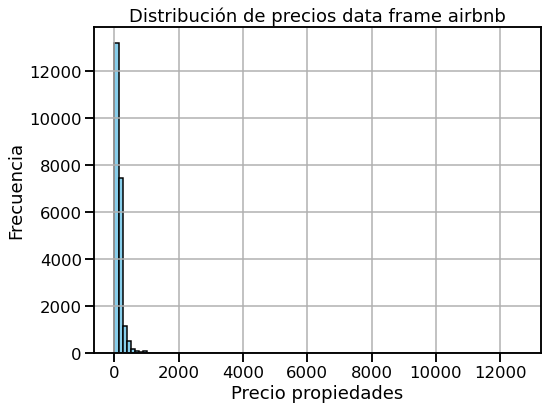

In [23]:
#Distribucion de precios airbnb
plt.figure(figsize=(8, 6))
df = airbnb_relev
plt.hist(df['price'], bins=100, color='skyblue', edgecolor='black')
plt.title('Distribución de precios data frame airbnb')
plt.xlabel('Precio propiedades')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

<Figure size 576x432 with 0 Axes>

(array([5.340e+02, 3.269e+03, 3.770e+03, 2.168e+03, 1.609e+03, 9.150e+02,
        4.980e+02, 3.120e+02, 1.730e+02, 1.290e+02, 6.900e+01, 4.100e+01,
        2.800e+01, 2.300e+01, 1.100e+01, 8.000e+00, 8.000e+00, 1.000e+00,
        7.000e+00, 1.000e+00, 1.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([  8.5       ,  38.21666667,  67.93333333,  97.65      ,
        127.36666667, 157.08333333, 186.8       , 216.51666667,
        246.23333333, 275.95      , 305.66666667, 335.38333333,
        365.1       , 394.81666667, 424.53333333, 454.25      ,
        483.96666667, 513.68333333, 543.4       , 573.11666667,
        602.83333333, 632.55      , 662.26666667, 691.98333333,
        721.7       , 751.41666667, 781.13333333, 810.85      ,
        840.56666667, 870.28333333, 900.        ]),
 <BarContainer object of 30 artists>)

Text(0.5, 1.0, 'Distribución de precios data frame Melbourne')

Text(0.5, 0, 'Precio propiedades')

Text(0, 0.5, 'Frecuencia')

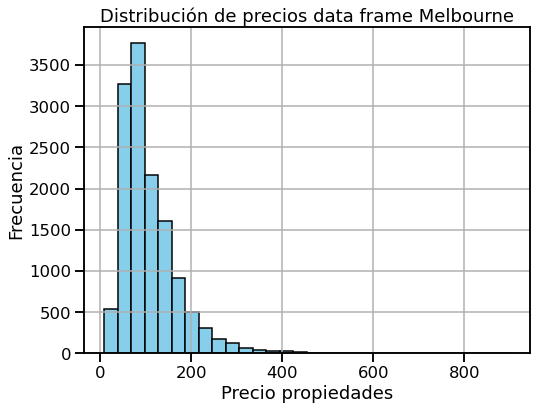

In [24]:
#Distribucion de precios melbourne
plt.figure(figsize=(8, 6))
df = melb_relev
plt.hist(df['Price'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribución de precios data frame Melbourne')
plt.xlabel('Precio propiedades')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

In [25]:
# Removemos los valores extremos con respecto a la columna Price para:
# Datos Melbourne
Q1 = melb_relev['Price'].quantile(0.01)
Q3 = melb_relev['Price'].quantile(0.99)
IQR = Q3 - Q1
Price = "Price"
melb_relev = melb_relev[~((melb_relev[Price]<(Q1))|(melb_relev[Price]>(Q3)))]
# Datos airbnb
Q1 = airbnb_relev['price'].quantile(0.01)
Q3 = airbnb_relev['price'].quantile(0.99)
IQR = Q3 - Q1
price = "price"
airbnb_relev = airbnb_relev[~((airbnb_relev[price]<(Q1))|(airbnb_relev[price]>(Q3)))]

airbnb_data = airbnb_relev

Distribuciones de los precios de ambos data frames luego de eliminar los outliers.

<Figure size 576x432 with 0 Axes>

(array([1.553e+03, 2.166e+03, 2.208e+03, 1.838e+03, 2.643e+03, 1.280e+03,
        2.149e+03, 1.329e+03, 1.750e+03, 8.370e+02, 9.790e+02, 7.430e+02,
        3.380e+02, 2.180e+02, 5.080e+02, 1.600e+02, 2.170e+02, 3.750e+02,
        4.900e+01, 7.900e+01, 1.850e+02, 3.700e+01, 7.400e+01, 6.100e+01,
        1.490e+02, 3.900e+01, 1.100e+01, 7.800e+01, 1.900e+01, 2.100e+01,
        1.160e+02, 3.000e+00, 1.800e+01, 3.600e+01, 7.000e+00, 5.000e+00,
        2.100e+01, 9.200e+01, 9.000e+00, 0.000e+00, 3.100e+01, 4.000e+00,
        7.000e+00, 2.900e+01, 2.000e+00, 3.000e+00, 2.300e+01, 1.000e+00,
        5.000e+00, 3.500e+01]),
 array([ 25. ,  40.5,  56. ,  71.5,  87. , 102.5, 118. , 133.5, 149. ,
        164.5, 180. , 195.5, 211. , 226.5, 242. , 257.5, 273. , 288.5,
        304. , 319.5, 335. , 350.5, 366. , 381.5, 397. , 412.5, 428. ,
        443.5, 459. , 474.5, 490. , 505.5, 521. , 536.5, 552. , 567.5,
        583. , 598.5, 614. , 629.5, 645. , 660.5, 676. , 691.5, 707. ,
        722.5, 738. ,

Text(0.5, 1.0, 'Distribución de precios data frame airbnb')

Text(0.5, 0, 'Precio propiedades')

Text(0, 0.5, 'Frecuencia')

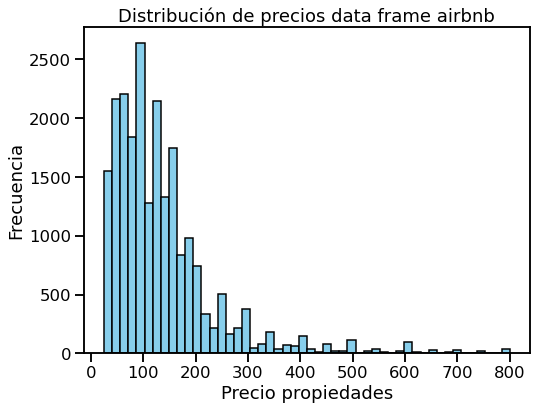

In [27]:
#Distribucion de precios airbnb
plt.figure(figsize=(8, 6))
df = airbnb_relev
plt.hist(df['price'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribución de precios data frame airbnb')
plt.xlabel('Precio propiedades')
plt.ylabel('Frecuencia')
#plt.grid(True)
plt.show()

<Figure size 576x432 with 0 Axes>

(array([267., 417., 558., 665., 758., 832., 822., 809., 788., 781., 652.,
        585., 395., 382., 481., 413., 464., 323., 361., 281., 185., 241.,
        183., 214., 158., 144., 145.,  80., 125.,  75.,  63.,  65.,  76.,
         55.,  67.,  34.,  43.,  53.,  31.,  30.,  22.,  39.,  31.,  17.,
         28.,  10.,  13.,  19.,  14.,  16.]),
 array([ 30.  ,  36.07,  42.14,  48.21,  54.28,  60.35,  66.42,  72.49,
         78.56,  84.63,  90.7 ,  96.77, 102.84, 108.91, 114.98, 121.05,
        127.12, 133.19, 139.26, 145.33, 151.4 , 157.47, 163.54, 169.61,
        175.68, 181.75, 187.82, 193.89, 199.96, 206.03, 212.1 , 218.17,
        224.24, 230.31, 236.38, 242.45, 248.52, 254.59, 260.66, 266.73,
        272.8 , 278.87, 284.94, 291.01, 297.08, 303.15, 309.22, 315.29,
        321.36, 327.43, 333.5 ]),
 <BarContainer object of 50 artists>)

Text(0.5, 1.0, 'Distribución de precios data frame Melbourne')

Text(0.5, 0, 'Precio propiedades')

Text(0, 0.5, 'Frecuencia')

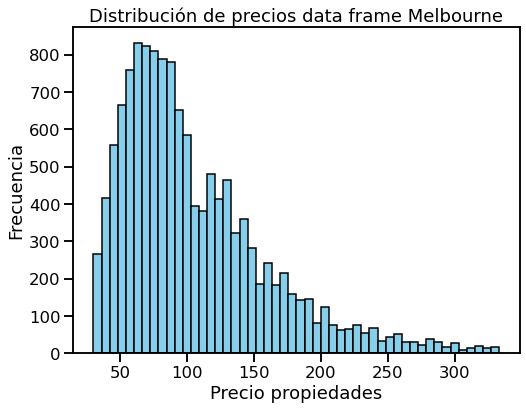

In [28]:
#Distribucion de precios melbourne
plt.figure(figsize=(8, 6))
df = melb_relev
plt.hist(df['Price'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribución de precios data frame Melbourne')
plt.xlabel('Precio propiedades')
plt.ylabel('Frecuencia')
#plt.grid(True)
plt.show()

# Agregado de información adicional y mergeo de la información

Queremos agregar información adicional al conjunto de datos que ofrece el data frame Melbourne. Esta info adicional la sacaremos del data frame airbnb. Para poder realizar esta combinación de datos, tenemos que encontrar una columna que contenga información en común, en este caso será la columna zipcode de airbnb que es equivalente a la postcode de melbourne.

Información adicional: *precios promedios*. A partir de la columna de precios que figuran en el data frame airbnb_relev (df formado por columnas relevantes), calcularemos el promedio de los mismos para un dado zipcode.

Consideramos previas a tener en cuenta:
- tenemos que asegurarnos de que tengamos suficientes registros en común como para agregar información relevantes. Comparamos la cantidad de zipcode/postcode en comun entre ambos data frame
- sólo incluimos los zipcodes que tengan una cantidad mínima de registros como para que la información agregada sea relevante.

In [29]:
#  Calculamos la cantidad de registros en comun entre ambos data frame
intersection = np.intersect1d(
    airbnb_relev.zipcode.values, melb_relev.Postcode.values, assume_unique=False)
print("zipcodes de airbnb", len(airbnb_relev.zipcode.unique()))
print("zipcodes de melbourne", len(melb_relev.Postcode.unique()))
print("zipcodes en comun", len(intersection))


zipcodes de airbnb 248
zipcodes de melbourne 197
zipcodes en comun 191


Consideramos que 191 zipcode/postcode en comun son suficientes. Veamos la cantidad de registro por zipcode en ambos data frame.

In [30]:
# Data frame airbnb: cantidad de registros para cada zipcode
airbnb_relev.zipcode.value_counts().tail(80)

3074    12
3172    12
3179    11
3752    11
3088    11
        ..
3785     1
3753     1
3912     1
3096     1
4068     1
Name: zipcode, Length: 80, dtype: int64

In [31]:
# Data frame melbourne: cantidad de registros para cada postcode
melb_relev.Postcode.value_counts().head(10)

3073    353
3020    299
3121    291
3040    284
3046    281
3165    249
3058    244
3072    238
3032    235
3163    232
Name: Postcode, dtype: int64

Decidimos considerar los zipcode con registros mayor a 10 del data frame airbnb.

In [32]:
#Me saco los NaN
airbnb_relev = airbnb_relev.dropna()

#Eliminamos los zipccode con cantidad de registros menores a 10
#Agregamos columna
airbnb_relev['size_zipcode'] = airbnb_relev.groupby('zipcode')['zipcode'].transform('size')
#La función transform es útil para realizar operaciones de transformación basadas en grupos sin cambiar la estructura del DataFrame original.
# a función transform en pandas es una función que se utiliza para aplicar una función de transformación a cada grupo de datos en un objeto 
#DataFrameGroupBy y devolver un objeto que tiene el mismo índice y longitud que el objeto de entrada original, pero con los valores transformados 
#según la función especificada.

#Eliminamos los zipcode con número de registro (size_zipcode) menor a 10. Tener diez registros para un zipcode nos parecio suficiente para
#un promedio y dar una estimacion del precio para esa zona
airbnb_relev_filt = airbnb_relev[airbnb_relev['size_zipcode'] >= 10]

# Eliminar la columna temporal 'size_zipcode'
airbnb_relev_filt = airbnb_relev_filt.drop(columns=['size_zipcode'])


Calculamos los promedios de los precios por zipcode y agregamos una columna con esa información al data frame airbnb

In [33]:
#La funcion transform con la opcion mean, calcula el promedio de precios para los grupos de la columna zipcode
airbnb_relev_filt['Precio_promedio'] = airbnb_relev_filt.groupby('zipcode')['price'].transform('mean')

Antes de mergear, necesitamos que el data frame de airbnb que vamos a utilizar no tenga valores repetidos para un mismo zipcode (sino va a pasar lo que vimos en el teorico que la cantidad de filas crece exponencialmente).

In [34]:
#Nuevo data frame de airbnb para mergear airbnb_merge
#sacamos columna precios
airbnb_merge = airbnb_relev_filt[["zipcode", "Precio_promedio"]]

#Limpio los duplicados
airbnb_merge = airbnb_merge.drop_duplicates()
airbnb_merge[:5], len(airbnb_merge)

(   zipcode  Precio_promedio
 0     3105       116.260870
 1     3057       154.432432
 2     3182       136.987533
 3     3071       104.750000
 4     3183       120.360248,
 180)

Concatenamos los datos de la nueva columna creada con el data framde de melbourne.

In [35]:
melb_relev.shape

(13310, 5)

In [36]:
merged_melb_airbnb = melb_relev.merge(
    airbnb_merge, how='left',
    left_on='Postcode', right_on='zipcode'
)
merged_melb_airbnb.sample(5) #la cardinalidad es un buen indicio para controlar que el merge haya sido correcto y que no haya pegado cualquiera

,Price,Postcode,Landsize,Car,YearBuilt,zipcode,Precio_promedio
8039,57.5,3207,7159.0,1.0,2008.0,3207.0,191.478261
9564,110.0,3032,239.0,2.0,NaN,3032.0,103.911765
12341,270.0,3191,722.0,1.0,1890.0,3191.0,179.408163
10691,215.0,3187,696.0,2.0,NaN,3187.0,140.836735
7298,123.0,3032,538.0,2.0,NaN,3032.0,103.911765


In [37]:
merged_melb_airbnb.shape

(13310, 7)

Por un lado las otras columnas que hay en comun en ambos data frame aparte de Postcode/zipcode son: "Lattitude", "Longtitude" y "Suburb". Asi que estas columnas son las que podrian utilizarse también para hacer la combinación de los data frame. Aunque en el caso de la latitud y longitud habría que utilizarlas en conjunto, por otro lado al ser algo mas específico que el código postal puede ser utilizado para una implentación mas compleja en la que dada una cierta coordenada, agrupe todas las propiedades que se encuentren a un determinado valor de radio de dicho punto. 

## Ejercicio 3:

Crear y guardar un nuevo conjunto de datos con todas las transformaciones realizadas anteriormente.

In [38]:
#SQL: ejercicio 1
df_join.to_csv("datos_Melb_airbnb_SQL.csv", index=None)
#Panda: ejercicio 2
merged_melb_airbnb.to_csv("datos_Melb_airbnb_pandas.csv", index=None)

## Ejercicios opcionales:

1. Armar un script en python (archivo .py) [ETL](https://towardsdatascience.com/what-to-log-from-python-etl-pipelines-9e0cfe29950e) que corra los pasos de extraccion, transformacion y carga, armando una funcion para cada etapa del proceso y luego un main que corra todos los pasos requeridos.

2. Armar un DAG en Apache Airflow que corra el ETL. (https://airflow.apache.org/docs/apache-airflow/stable/tutorial.html)